In [19]:
import pandas as pd
import numpy as np
from sklearn.metrics import roc_auc_score as auc
from sklearn.metrics import roc_curve, f1_score, balanced_accuracy_score, accuracy_score
from  sklearn.metrics import confusion_matrix as cm
import matplotlib.pyplot as plt
import nltk

In [20]:
def return_no_words(x):
    x = nltk.tokenize.word_tokenize(x)
    return len(x)

In [21]:
def report_results(results_path):
    results = pd.read_csv(results_path)
    # 1 prediction distribution of aggression
    # 0 negative prediction distribution of aggression
    plt.hist([results["y_predict_prob_1"],results["y_predict_prob_0"]])
    plt.ylim(0, 1000)
    plt.xlim(0,1,0.1)

    # predict.prob scores
    fpr, tpr, thrshold = roc_curve(results["y_true_bool"], results["y_predict_prob_1"])
    roc_auc = auc(results["y_true_bool"], results["y_predict_prob_1"])
    print("AUC score", roc_auc)
    plt.figure()
    lw = 2
    plt.plot(fpr, tpr, color='darkorange',
             lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    # predict scores
    fpr, tpr, thrshold = roc_curve(results["y_true_binary"], results["y_prediction"])
    roc_auc = auc(results["y_true_binary"], results["y_prediction"])
    print("AUC score", roc_auc)
    # Confusion Matrix
    tn, fp, fn, tp = cm(y_true=results["y_true_binary"], y_pred=results["y_prediction"]).ravel()
    print("CM", tn, fp, fn, tp)
    F1_score = f1_score(y_true=results["y_true_binary"], y_pred=results["y_prediction"])
    print("F1-score", F1_score)
    #imbalanced accuracy score - NOT TO Trust
    imbalanced_accuracy_score = accuracy_score(y_true=results["y_true_binary"], y_pred=results["y_prediction"])
    print("imbalanced_accuracy_score", imbalanced_accuracy_score)

In [22]:
def dataset_features_analysis(data, no_features_to_return=10):
    from sklearn.feature_extraction.text import CountVectorizer
    from sklearn.feature_extraction.text import TfidfTransformer
    from sklearn.pipeline import Pipeline
    pipe = Pipeline([('count',  CountVectorizer(ngram_range=(1,2), analyzer='word', max_features=10000)),
                         ('tfid',TfidfTransformer(norm='l2', sublinear_tf=True))]).fit(data)
    data_features = pipe.transform(data)
    print("Features mean", data_features.mean())
    sum_words = data_features.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in pipe['count'].vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    print("Most occuring features", words_freq[:no_features_to_return])
    return words_freq

# Kaggle linear word oh

AUC score 0.8593432560994323


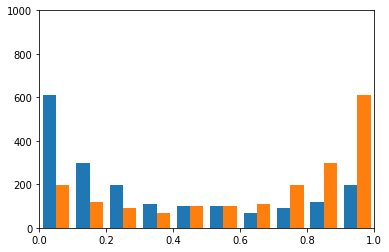

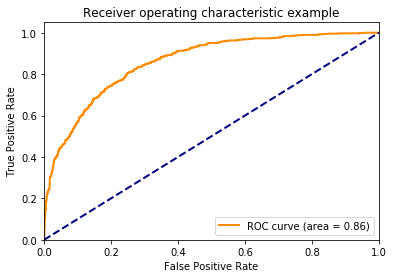

AUC score 0.7517722878625134
CM 1070 155 246 419
F1-score 0.6763518966908798
imbalanced_accuracy_score 0.7878306878306879


In [23]:
report_results("linear_word_oh_kaggle_prediction_results.csv")

# Kaggle linear char oh

AUC score 0.8358891758954109


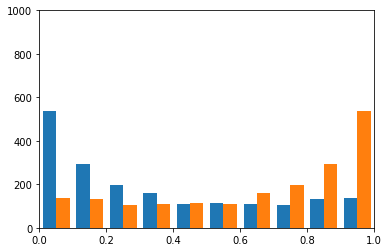

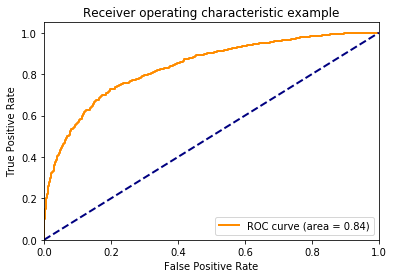

AUC score 0.748734449689736
CM 1059 177 235 419
F1-score 0.6704
imbalanced_accuracy_score 0.782010582010582


In [24]:
report_results("linear_char_oh_kaggle_prediction_results.csv")

# Kaggle mlp word oh

AUC score 0.5865272166861178


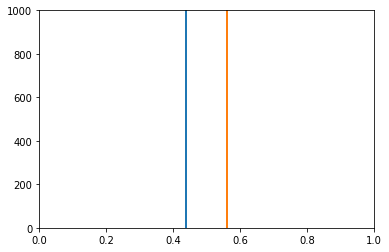

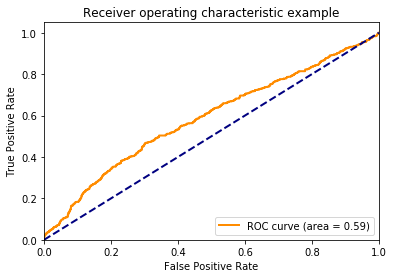

AUC score 0.5
CM 1185 0 705 0
F1-score 0.0
imbalanced_accuracy_score 0.626984126984127


In [25]:
report_results("mlp_word_oh_kaggle_prediction_results.csv")

# Kaggle mlp char oh

AUC score 0.6176685495537164


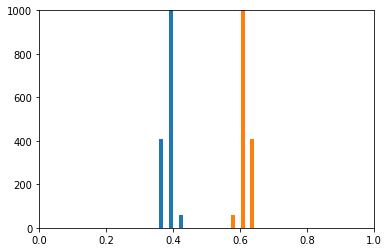

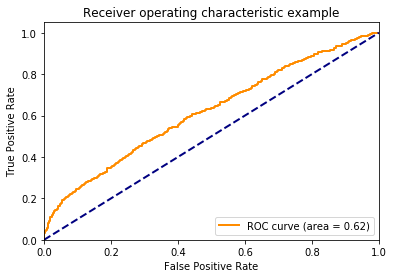

AUC score 0.5
CM 1228 0 662 0
F1-score 0.0
imbalanced_accuracy_score 0.6497354497354497


In [26]:
report_results("mlp_char_oh_kaggle_prediction_results.csv")

# lstm kaggle word

AUC score 0.8594097562707428


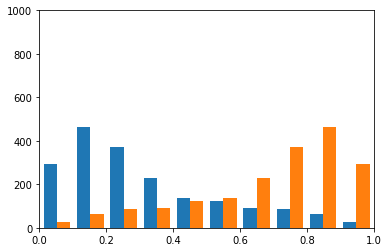

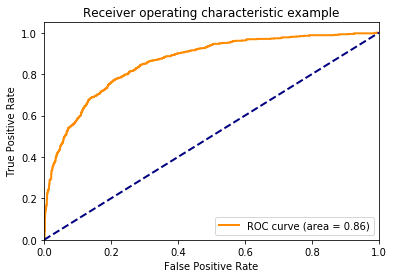

AUC score 0.7108357848268162
CM 1150 71 348 321
F1-score 0.6050895381715363
imbalanced_accuracy_score 0.7783068783068783


In [27]:
report_results("lstm_word_oh_kaggle_prediction_results.csv")

# lstm kaggle char

AUC score 0.6378153515834675


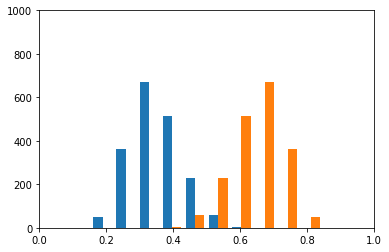

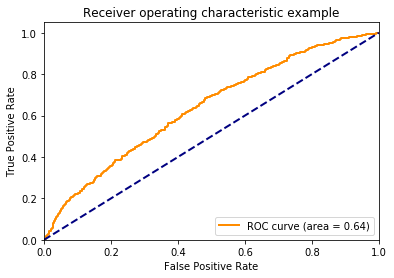

AUC score 0.5157340311325818
CM 1214 28 613 35
F1-score 0.09845288326300984
imbalanced_accuracy_score 0.6608465608465608


In [28]:
report_results("lstm_char_oh_kaggle_prediction_results.csv")

# conv_lstm kaggle word

AUC score 0.7409719142645972


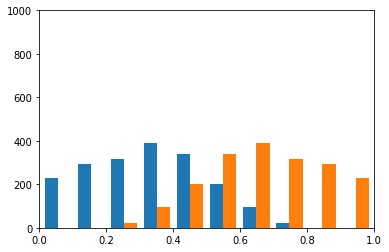

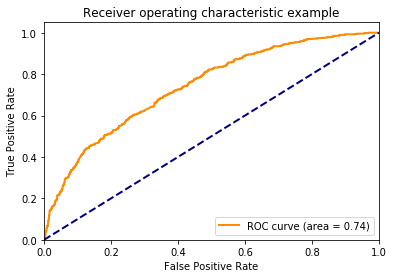

AUC score 0.6275868440502588
CM 1132 98 439 221
F1-score 0.45148110316649637
imbalanced_accuracy_score 0.7158730158730159


In [29]:
report_results("conv_lstm_word_oh_kaggle_prediction_results.csv")

# conv_lstm kaggle char

AUC score 0.7568382992901673


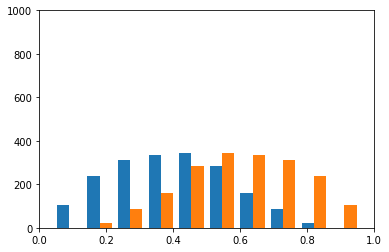

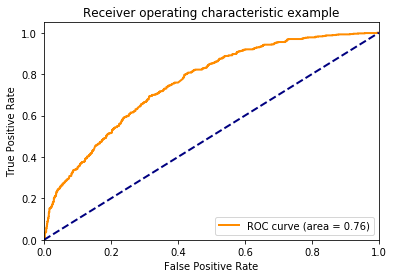

AUC score 0.6592942720573237
CM 1028 239 307 316
F1-score 0.5365025466893039
imbalanced_accuracy_score 0.7111111111111111


In [30]:
report_results("conv_lstm_char_oh_kaggle_prediction_results.csv")

# Data Analysis

In [31]:
kaggle_data = pd.read_csv("../kaggle_parsed_dataset.csv")

In [32]:
kaggle_data = kaggle_data.dropna()

In [33]:
len(kaggle_data)

7557

In [34]:
len(kaggle_data[kaggle_data["oh_label"] == 1])

2649

In [35]:
len(kaggle_data[kaggle_data["oh_label"] == 1])

4908

In [36]:
len(kaggle_data[kaggle_data["oh_label"] == 1])/len(kaggle_data)

0.3505359269551409

In [37]:
len(kaggle_data)

7557

In [38]:
#avergae number of words per post
kaggle_data["No words"] = kaggle_data["Text"].apply(lambda x : return_no_words(x))

In [39]:
np.mean(kaggle_data["No words"])

31.694720127034536

In [40]:
np.std(kaggle_data["No words"])

44.95711676035439

In [41]:
np.var(kaggle_data["No words"])

2021.1423474041376

(0, 1000)

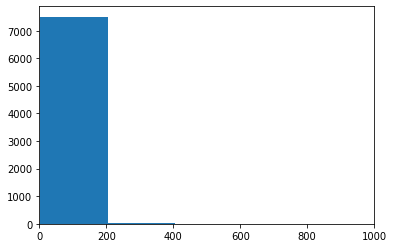

In [42]:
plt.hist(kaggle_data["No words"])
plt.xlim(0,1000)

In [43]:
len(kaggle_data[kaggle_data["No words"] == 0])

0

(0, 1000)

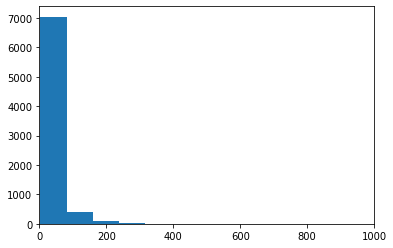

In [44]:
plt.hist(kaggle_data[(kaggle_data["No words"] > 0) & (kaggle_data["No words"] <= 1000)]["No words"])
plt.xlim(0,1000)

(0, 200)

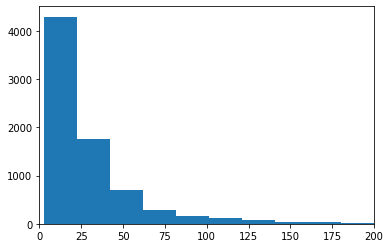

In [45]:
plt.hist(kaggle_data[(kaggle_data["No words"] >= 0) & (kaggle_data["No words"] <= 200)]["No words"])
plt.xlim(0,200)

(0, 40)

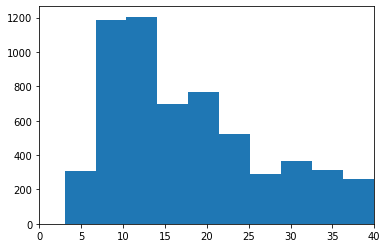

In [46]:
plt.hist(kaggle_data[(kaggle_data["No words"] >= 0) & (kaggle_data["No words"] <= 40)]["No words"])
plt.xlim(0,40)

# Feature analysis

In [47]:
df_kaggle = dataset_features_analysis(kaggle_data["Text"],1000)

Features mean 0.00042815845947798077
Most occuring features [('you', 390.32586697288883), ('are', 255.18320282332942), ('the', 243.6042634444446), ('to', 197.55592910733188), ('your', 194.72081398376653), ('and', 189.19651559338845), ('you are', 175.23663985399733), ('is', 154.62075979797524), ('of', 152.78922905340426), ('that', 142.98319726613224), ('it', 139.74149195520087), ('xa0', 124.58899085765971), ('in', 122.29876754179305), ('like', 112.40783599313535), ('for', 105.67415477518803), ('re', 105.01645244340641), ('on', 101.67077240846304), ('not', 97.80066986624959), ('be', 96.49489479149487), ('are you', 95.7920542041524), ('you re', 94.96398210234777), ('fuck', 93.04343569589942), ('have', 91.47057947070284), ('what', 86.84757711168444), ('this', 86.36903667083824), ('just', 85.44588812236178), ('he', 80.63086960075077), ('so', 78.1039389475594), ('an', 77.28195680028344), ('with', 76.59974796049427), ('all', 75.45208717652005), ('don', 73.97659093701645), ('as', 71.2986405129

In [48]:
words = []
numbers = []
for i in df_kaggle:
    words.append(i[0])
    numbers.append(i[1])
pd.DataFrame({"kaggle_features": words, "kaggle_featurs_No": numbers}).to_csv("kaggle_features.csv")